# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

In [15]:
import tensorflow as tf
from tensorflow import keras

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [16]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [18]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

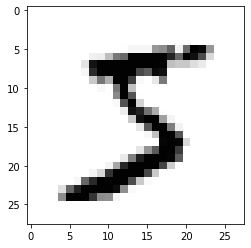

In [37]:
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [22]:
y_train.shape

(60000,)

In [23]:
# show MNIST label for above data
y_train[0]

5

## 나만의 모델을 tensorflow keras API 를 이용해 만들어 봅시다~

* parameters for model

In [ ]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# dropout
dropout_rate = 0.3
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation = "sigmoid"),
    tf.keras.layers.Dense(2, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate)
])


# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

#### My Own Model 

In [41]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [50]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(units=256, input_dim=784, activation='relu'))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=32, activation='relu'))
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [51]:
#### 자유롭게 Model을 만들고 compile 해봅시다 ####
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [52]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_22 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_23 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_24 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_25 (Dense)             (None, 10)                330       
Total params: 244,522
Trainable params: 244,522
Non-trainable params: 0
_________________________________________________________________


In [48]:
print(model.layers[1].get_weights())
print(model.layers[2].get_weights())

[array([[-0.01092762,  0.05824965, -0.02809874, ..., -0.20246616,
        -0.054177  , -0.07094117],
       [-0.03040027,  0.0041535 ,  0.23880917, ..., -0.03419365,
         0.03601275,  0.05479065],
       [-0.05562855,  0.0684942 , -0.01321966, ...,  0.13065264,
        -0.02086962, -0.04947304],
       ...,
       [-0.00186135,  0.08213998,  0.1805306 , ...,  0.01761483,
         0.11764074, -0.00238967],
       [-0.03343778, -0.01035624,  0.04524651, ...,  0.04438863,
         0.02550465, -0.12499321],
       [ 0.09436823,  0.05285006,  0.02601338, ..., -0.11190544,
        -0.05598081,  0.02920692]], dtype=float32), array([ 0.04788701, -0.03945476,  0.03276603, -0.07147855, -0.0069006 ,
        0.11112349,  0.03292991, -0.01534175, -0.05557761, -0.02485836,
       -0.08847234, -0.05992677, -0.06571185,  0.08911142, -0.04321982,
        0.01005538, -0.01122835,  0.05468332,  0.03688216,  0.02422137,
        0.02922886,  0.02887506,  0.02740315, -0.04810854, -0.05711441,
        0.

내가 만든 모델을 확인해 봅시다.

model을 자유롭게 train 해봅시다.  

In [55]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 [==============================] - 4s 5ms/step - loss: 0.2734 - accuracy: 0.9209
Epoch 2/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1051 - accuracy: 0.9687
Epoch 3/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0686 - accuracy: 0.9787
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0507 - accuracy: 0.9844
Epoch 5/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0416 - accuracy: 0.9869
Epoch 6/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0331 - accuracy: 0.9888
Epoch 7/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0279 - accuracy: 0.9908
Epoch 8/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0223 - accuracy: 0.9926
Epoch 9/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0221 - accuracy: 0.9929
Epoch 10/10
600/600 [==============================] - 3s 5ms/step - loss: 0.0173 - accuracy: 0.9942

95%이상의 성능을 가진 모델을 만들면 완성!

In [56]:
test_loss, test_acc = model.evaluate(x_test,y_test, verbose=2)

print('\nAccuracy:', test_acc)

313/313 - 0s - loss: 0.0877 - accuracy: 0.9786

Accuracy: 0.978600025177002


![](https://www.tensorflow.org/versions/master/images/mnist_tensorboard.png)